In [1]:
import pandas as pd
import re
from pandas import read_excel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score

import sklearn
import nltk
nltk.download('punkt')
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tahin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
my_sheet = 'Sheet1'
file_name = r"C:\Users\tahin\Desktop\cse475\ml.xlsx" # name of the excel file
data = read_excel(file_name, sheet_name = my_sheet)
print(data.head()) # shows headers with top 5 rows

                                              Review    Target  Sentiment
0  পাল্প ফিকশন দেখলাম। আগে রেটিং টা দেখেনিয়েছিলাম...  Positive          1
1  মুভি রিভিউঃ পদ্মাবতী (padmavati) এক নারী লোভীর...  Positive          1
2  হালকা স্পয়লার! মুভিঃ দারুচিনি দ্বীপ রেটিং- ৯.৫...  Positive          1
3  Joker (2019) IMDB রেটিং – 9.5 কোন রেটিং দিয়ে ম...  Positive          1
4  এই সপ্তাহে দেখা মুভির রিভিউ- জাজমেন্টাল হ্যায় ...  Negative          0


In [3]:
review= data.Review
sentiment = data.Sentiment

In [4]:
#convert dataframe to matrix
matrixOFdata1= review.values
matrixOFdata2= sentiment.values
review = matrixOFdata1.ravel()
sentiment = matrixOFdata2.ravel()

In [5]:
review[0]

'পাল্প ফিকশন দেখলাম। আগে রেটিং টা দেখেনিয়েছিলাম।বেশ ভালো রেটিং আই এম ডিবিতে ।৮.৯। খুটায়া খুটায়া সময় নিয়া , ডায়লগ গুলা দেখছি।মুভিটা কয়েকটা গল্পের কম্বিনেশন , একটি সুতোয় আবার গল্পগুলো জোড়ানো। তবে মুভিটাতে এত রেটিং থাকার রহস্য কি বুঝিনাই । মুভিটা এত ভাল হবার কারণ, রেটিং এত হাই থাকার কারণ কিংবা গল্পগুলার মাঝে বিশেষ কোন মেসেজ আছে কি নাই'

In [6]:
# review_train=[line.replace(',','asdsadasdadadad') for line in review_train]

REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

def preprocess_reviews(reviews):
    reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
    reviews = [re.sub(" \d+", " ", line) for line in reviews]
    reviews = [line.lower() for line in reviews]
    # reviews = [REMOVE_NUMBER.sub(" ", line) for line in reviews]

    return reviews


# REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
# review_train = [REPLACE_NO_SPACE.sub("", line.lower()) for line in review_train]

In [7]:
review = preprocess_reviews(review)

# sentiment_train = preprocess_reviews(sentiment_train)
# sentiment_test = preprocess_reviews(sentiment_test)

In [8]:
# initialize movie_vector object, and then turn movie train data into a vector 
movie_vec = CountVectorizer(min_df=2, tokenizer=nltk.word_tokenize)         
review = movie_vec.fit_transform(review)

In [9]:
# Convert raw frequency counts into TF-IDF values
tfidf_transformer = TfidfTransformer()
review = tfidf_transformer.fit_transform(review)
# review_test=tfidf_transformer.fit_transform(review_test)

In [10]:
# Same dimensions, now with tf-idf values instead of raw frequency counts
review.shape

(35, 711)

In [11]:
sentiment.shape

(35,)

In [12]:
# Split data into training and test sets

review_train,review_test, sentiment_train, sentiment_test = train_test_split(
    review, sentiment, test_size = 0.10, random_state = 12)

In [13]:
review_train.shape

(31, 711)

In [14]:
sentiment_train.shape

(31,)

In [15]:
review_test.shape

(4, 711)

In [16]:
sentiment_test.shape

(4,)

In [17]:
# Train a Multimoda Naive Bayes classifier
NB = MultinomialNB()
NB= NB.fit(review_train, sentiment_train)
y_pred_NB = NB.predict(review_test)
NB_accuracy = sklearn.metrics.accuracy_score(sentiment_test, y_pred_NB)
NB_accuracy

0.5

In [18]:
# Train a decition tree classifier 
dt =  DecisionTreeClassifier(min_samples_split = 500, criterion = 'entropy')
dt = dt.fit(review_train, sentiment_train)
y_pred_DT = dt.predict(review_test)
DT_accuracy = sklearn.metrics.accuracy_score(sentiment_test, y_pred_DT)
DT_accuracy

0.75

In [19]:
# Train a SVM classifier 
svm_clf = svm.SVC(gamma='scale')
svm_clf = svm_clf.fit(review_train, sentiment_train)
y_pred_svm_clf = svm_clf.predict(review_test)
svm_clf_accuracy = sklearn.metrics.accuracy_score(sentiment_test, y_pred_svm_clf)
svm_clf_accuracy

0.5

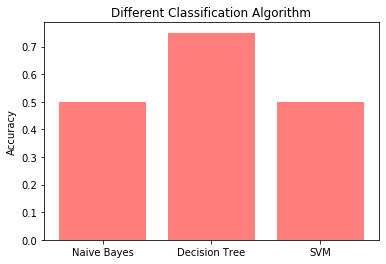

In [20]:
objects = ('Naive Bayes', 'Decision Tree', 'SVM')
y_pos = np.arange(len(objects))
performance = [NB_accuracy, DT_accuracy,  svm_clf_accuracy]

plt.bar(y_pos, performance, align='center', alpha=0.5, color = "red")
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Different Classification Algorithm')

plt.show()

In [21]:
reviews_new = ['ফিল্ম - আর্টিকেল ১৫ (Article 15) IMDB রেটিং - 6.5/10 এ্যানাদার মাষ্টারপিস ফ্রম আয়ুষ্মান খুরানা। মুভিটা প্রথম যখন মুক্তি পায় হল প্রিন্টই ডাউনলোড দিয়ে দেখে ফেলছিলাম। আয়ুষ্মানের মুভি বলে কথা! কিন্তু সমস্যা ছিল, হল প্রিন্ট দেখে কিছুই মাথায় ঢুকছিলো নাহ! মুভির সব কাহিনী মাথার উপ্রে দিয়া গেছিলো! তাই এইচডি আসার পরপরই ডাউনলোড দিয়ে ফেলছিলাম। দেখার সময় পাচ্ছিলাম নাহ! আজ সময় করে দেখতে বসে গেলাম। ভাই রে ভাই, দেখার পরে তো আমি একদম থ হয়ে গেছি! মুভির কনসেপ্ট, বিজিএম, অভিনয়, সব কিছুই ছিল মন-মুগ্ধকর! ❤ কাহিনী সংক্ষেপে - সদ্য এএসপি হওয়া আয়ুষ্মান খুরানার পোস্টিং হয় ইন্ডিয়ার এক গ্রামে। ওয়েল কালচারড, অনেষ্ট পুলিশ অফিসার। যে কি না ভাল স্মনামধন্য বিশ্ববিদ্যালয় থেকে লেখাপড়া করে, এরপর পোষ্ট গ্রাড করেছে ফরেন থেকে। গ্রামের রীতি রেওয়াজ সম্পর্কে যার কোন ধারনাই নেই! তার আসার পরের দিনই দুই মেয়ের ঝুলন্ত লাশ উদ্ধার হয়। জানা যায় দুদিন আগে তিন মেয়ে নিখোঁজ হয়। লোকার পুলিশ বলে, এটা নিজেরাই খুন করছে। কারন তাদের নাকি সমকামী সম্পর্ক ছিল! যেটা গ্রামের বাবা-মা মেনে নিতে পারে নাই! তাই নাকি খালাস করে দিছে! কিন্তু সমস্যা হল, দুই মেয়ের লাশ পাওয়া গেলেও ৩য় মেয়েকে পাওয়া যাচ্ছিলো নাহ! তাদের প্রতি কারো কোনো সহমর্মিতা ছিলো নাহ। কারন তারা ছিল নিচু জাত! তাই বলে তো আর কেস থেমে থাকবে নাহ! যেহেতু সেখানে আয়ুষ্মান আছে! 😀 আসলে কি হয়ে ছিলো এই তিন মেয়ের সাথে? আসলেই কি এটা তারা নিজেরা হত্যা করছিলো? আর যদি করেই, তাহলে ৩য় মেয়েটা কোথায়? জানতে হলে অবশ্যই আপনাকে মুভিটা দেখতে হবে।', 'Absolute joy ride', 
            ]

In [22]:
new = input()

Raees (2017), শাহরুখ খান ,নওয়াজুদ্দীন সিদ্দিকী, মোহাম্মেদ জিসান আইয়ুব, অভিনীত মুভি এটা । মুভিতে এত বড় বড় সমস্ত অভিনেতারা অভিনয় করেছেন যে তাদের কথা চিন্তা করলে মনে হয় এদের জন্য কাহিনীর দরকার নেই । এরা যদি সাধারণ ভাবে নিজেদের মধ্যে কথা বার্তা বলে তাই পারফেক্ট কাহিনি সহ অভিনয় হয়ে যাবে আর এই কথা গুলো ফাস্ট ভেবেছিলাম যখন এর স্টার কাস্ট সম্পর্কে জেনেছিলাম । আর মুভি দেখার পর আমার প্রত্যাশা কি রকম পূরণ হয়ে ছিল তা একটু পরে বলছি। তার আগে একটা বিষয় নিয়ে কিছু কথা বলে নেই । আমারা অনেকে আছি যারা নিজেদের ক্লাস প্রমান করার জন্য বলে থাকি যে আমারা বলিউড মুভি বেছে বেছে দেখি , আমারা নায়ক দেখে না পরিচালক দেখে মুভি দেখি , আমরা মুভি ফ্লপ হল না হিট হল সেটা বিবেচনা করে মুভি দেখিনা ,আমারা মুভির বিষয় বিবেচনা করে মুভি দেখি । এ ছাড়াও আরও কত কিছু । কিন্তু আসলে কি তাই আমার তো সেটা মনে হয় না , কারন যদি এমনটা হতো তাহলে যে সালমান এর টিউবলাইট নিয়ে অনেক হাশি ঠাট্টা হল সেই সালমান এর টাইগার জিন্দা হ্যায় নিয়ে প্রত্যেকের রিঅ্যাকশান ছিল অনেক ভালো , কিন্তু কেন এখানেও তো লজিক ছাড়া অনেক কিছু ছিল যেমন লাস্ট এ সালমান আর ক্যাটরি

In [28]:
reviews_new.append(new)

In [29]:
# very short and fake movie reviews
#reviews_new = ['ফিল্ম - আর্টিকেল ১৫ (Article 15) IMDB রেটিং - 6.5/10 এ্যানাদার মাষ্টারপিস ফ্রম আয়ুষ্মান খুরানা। মুভিটা প্রথম যখন মুক্তি পায় হল প্রিন্টই ডাউনলোড দিয়ে দেখে ফেলছিলাম। আয়ুষ্মানের মুভি বলে কথা! কিন্তু সমস্যা ছিল, হল প্রিন্ট দেখে কিছুই মাথায় ঢুকছিলো নাহ! মুভির সব কাহিনী মাথার উপ্রে দিয়া গেছিলো! তাই এইচডি আসার পরপরই ডাউনলোড দিয়ে ফেলছিলাম। দেখার সময় পাচ্ছিলাম নাহ! আজ সময় করে দেখতে বসে গেলাম। ভাই রে ভাই, দেখার পরে তো আমি একদম থ হয়ে গেছি! মুভির কনসেপ্ট, বিজিএম, অভিনয়, সব কিছুই ছিল মন-মুগ্ধকর! ❤ কাহিনী সংক্ষেপে - সদ্য এএসপি হওয়া আয়ুষ্মান খুরানার পোস্টিং হয় ইন্ডিয়ার এক গ্রামে। ওয়েল কালচারড, অনেষ্ট পুলিশ অফিসার। যে কি না ভাল স্মনামধন্য বিশ্ববিদ্যালয় থেকে লেখাপড়া করে, এরপর পোষ্ট গ্রাড করেছে ফরেন থেকে। গ্রামের রীতি রেওয়াজ সম্পর্কে যার কোন ধারনাই নেই! তার আসার পরের দিনই দুই মেয়ের ঝুলন্ত লাশ উদ্ধার হয়। জানা যায় দুদিন আগে তিন মেয়ে নিখোঁজ হয়। লোকার পুলিশ বলে, এটা নিজেরাই খুন করছে। কারন তাদের নাকি সমকামী সম্পর্ক ছিল! যেটা গ্রামের বাবা-মা মেনে নিতে পারে নাই! তাই নাকি খালাস করে দিছে! কিন্তু সমস্যা হল, দুই মেয়ের লাশ পাওয়া গেলেও ৩য় মেয়েকে পাওয়া যাচ্ছিলো নাহ! তাদের প্রতি কারো কোনো সহমর্মিতা ছিলো নাহ। কারন তারা ছিল নিচু জাত! তাই বলে তো আর কেস থেমে থাকবে নাহ! যেহেতু সেখানে আয়ুষ্মান আছে! 😀 আসলে কি হয়ে ছিলো এই তিন মেয়ের সাথে? আসলেই কি এটা তারা নিজেরা হত্যা করছিলো? আর যদি করেই, তাহলে ৩য় মেয়েটা কোথায়? জানতে হলে অবশ্যই আপনাকে মুভিটা দেখতে হবে।', 'Absolute joy ride', 
         #   'Steven Seagal was terrible', 'Steven Seagal shined through.', 
          #    'This was certainly a movie', 'Two thumbs up', 'I fell asleep halfway through', 
           #   "We can't wait for the sequel!!", 'I cannot recommend this highly enough', 
           #   'instant classic.', 'Steven Seagal was amazing. His performance was Oscar-worthy.']
reviews_new_counts = movie_vec.transform(reviews_new)
reviews_new_tfidf = tfidf_transformer.transform(reviews_new_counts)

In [30]:
# have classifier make a prediction
pred = NB.predict(reviews_new_tfidf) #we used naive bayes 

In [31]:
pred

array([0, 1, 1, 1], dtype=int64)

In [32]:
# print out results
for review, category in zip(reviews_new, pred):
    print('%r => %s' % (review, category))

'ফিল্ম - আর্টিকেল ১৫ (Article 15) IMDB রেটিং - 6.5/10 এ্যানাদার মাষ্টারপিস ফ্রম আয়ুষ্মান খুরানা। মুভিটা প্রথম যখন মুক্তি পায় হল প্রিন্টই ডাউনলোড দিয়ে দেখে ফেলছিলাম। আয়ুষ্মানের মুভি বলে কথা! কিন্তু সমস্যা ছিল, হল প্রিন্ট দেখে কিছুই মাথায় ঢুকছিলো নাহ! মুভির সব কাহিনী মাথার উপ্রে দিয়া গেছিলো! তাই এইচডি আসার পরপরই ডাউনলোড দিয়ে ফেলছিলাম। দেখার সময় পাচ্ছিলাম নাহ! আজ সময় করে দেখতে বসে গেলাম। ভাই রে ভাই, দেখার পরে তো আমি একদম থ হয়ে গেছি! মুভির কনসেপ্ট, বিজিএম, অভিনয়, সব কিছুই ছিল মন-মুগ্ধকর! ❤ কাহিনী সংক্ষেপে - সদ্য এএসপি হওয়া আয়ুষ্মান খুরানার পোস্টিং হয় ইন্ডিয়ার এক গ্রামে। ওয়েল কালচারড, অনেষ্ট পুলিশ অফিসার। যে কি না ভাল স্মনামধন্য বিশ্ববিদ্যালয় থেকে লেখাপড়া করে, এরপর পোষ্ট গ্রাড করেছে ফরেন থেকে। গ্রামের রীতি রেওয়াজ সম্পর্কে যার কোন ধারনাই নেই! তার আসার পরের দিনই দুই মেয়ের ঝুলন্ত লাশ উদ্ধার হয়। জানা যায় দুদিন আগে তিন মেয়ে নিখোঁজ হয়। লোকার পুলিশ বলে, এটা নিজেরাই খুন করছে। কারন তাদের নাকি সমকামী সম্পর্ক ছিল! যেটা গ্রামের বাবা-মা মেনে নিতে পারে নাই! তাই নাকি খালাস করে দিছে! কিন্তু সমস্যা হল, দুই 